## Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Import Packages

In [2]:
# Basics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Image processing and ELA conversion
from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

# General ML models
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
# from pandas_ml import ConfusionMatrix


# CNN
import tensorflow as tf
from tensorflow import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras import regularizers

sns.set(style='white', context='paper', palette='deep')
np.random.seed(2)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


## Check Class Balance of this Dataset

In [0]:
# Need to update the path when using google drive
paths = get_imlist('/content/drive/My Drive/fake-or-not/data/dataset')

# Create dataframe with file names
dataset = pd.DataFrame(paths, columns = ['file_name'])

# assign class according to file name
dataset['fake'] = 0

dataset['fake'] = np.where(dataset['file_name'].str.endswith('_fake.jpg'), 1, dataset['fake'])

# check the balance of the dataset
pd.crosstab(index = dataset['fake'], columns = 'Freq')/len(paths)*100

## Error Level Analysis
#### **Given that the ELA conversion runs for an hour or so we packaged the resulting NumPy arrays of ELA X and ELA Y in order to avoid that waiting whenever we are prototyping the CNN architecture. **

The code below will do the trick to convert all our dataset into ELA images and reduce their size to 128x128 pixels. 50 images yielded errors when converting them to ELA and where dropped from the analysis. *dataset_correct* is created to update the index with the above issue in mind.

We tried 90 and 95 for the quality parameter for ELA and finally choose to use 90.

In [0]:
def get_imlist(path):
    '''
    path: path to the folder containing all the images to work with
    '''
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.jpg') or f.endswith('.png')]


def convert_to_ela_image(path, quality):
    '''
    path: path to the folder containign all the images to convert
    quality: number between 0 and 100 (Recommended 90) to denote the quality in whihc the .jpg image will be resaved
    '''
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'
    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

In [0]:
X = []
Y = []

new_index = []
for index, row in dataset.iterrows():
    try:
        X.append(array(convert_to_ela_image(row[0], 90).resize((128, 128))).flatten() / 255.0)
        Y.append(row[1])
        new_index.append(index)
    except:
        print("Image {} dropped. Could not be processed.".format(re.sub('/content/drive/My Drive/fake-or-not/data/dataset', '', dataset['file_name'][index])))
        pass

    if index % 1000 == 0:

        print(index, "images parsed")

dataset_correct = dataset[dataset.index.isin(new_index)]
dataset_correct = dataset_correct.reset_index(drop=True)


X = np.array(X)
X = X.reshape(-1, 128, 128, 3)

Y = tf.keras.utils.to_categorical(Y, 2)  

0 images parsed
Image /132dcz_true.jpg dropped. Could not be processed.
Image /5t9lpo_true.jpg dropped. Could not be processed.
Image /1rf2uq_true.jpg dropped. Could not be processed.
1000 images parsed
2000 images parsed
Image /2l5s5t_true.jpg dropped. Could not be processed.
Image /5zwjgo_fake.jpg dropped. Could not be processed.
Image /7soscf_true.jpg dropped. Could not be processed.
Image /1rm6p8_true.jpg dropped. Could not be processed.
Image /1tfjy8_true.jpg dropped. Could not be processed.
3000 images parsed
Image /19728o_true.jpg dropped. Could not be processed.
Image /15c1rv_true.jpg dropped. Could not be processed.
Image /1aixhx_true.jpg dropped. Could not be processed.
Image /2wbpri_true.jpg dropped. Could not be processed.
4000 images parsed
Image /3rhvtt_true.jpg dropped. Could not be processed.
5000 images parsed
Image /2vlmp2_true.jpg dropped. Could not be processed.
Image /126c1h_true.jpg dropped. Could not be processed.
6000 images parsed
Image /1r8n2f_true.jpg dropped

/Users/luxiao/anaconda3/lib/python3.7/site-packages/PIL/Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


Image /1l44fa_true.jpg dropped. Could not be processed.
8000 images parsed
Image /3qyhjg_true.jpg dropped. Could not be processed.
9000 images parsed
10000 images parsed
Image /17fhzv_true.jpg dropped. Could not be processed.
11000 images parsed
Image /77ef0k_fake.jpg dropped. Could not be processed.
Image /4zjej1_true.jpg dropped. Could not be processed.
12000 images parsed
Image /16dpxo_true.jpg dropped. Could not be processed.
Image /3cr8cg_true.jpg dropped. Could not be processed.
Image /tvvex_fake.jpg dropped. Could not be processed.
13000 images parsed
Image /16d5ds_true.jpg dropped. Could not be processed.
Image /18g2iz_true.jpg dropped. Could not be processed.
Image /56pmwy_true.jpg dropped. Could not be processed.
Image /1a2xon_true.jpg dropped. Could not be processed.
Image /7ilw39_fake.jpg dropped. Could not be processed.
14000 images parsed
Image /49366m_true.jpg dropped. Could not be processed.
Image /2a1ejv_true.jpg dropped. Could not be processed.
Image /39wp12_fake.jpg 

In [0]:
# Save X,Y and dataset_correct to files
np.save('ps_battles_ela_X.npy',X)
np.save('ps_battles_ela_Y.npy',Y)
dataset_correct.to_csv('dataset_correct.csv')

KeyboardInterrupt: 

## Read in the X and Y after ELA 

In [0]:
dataset_correct = pd.read_csv("/content/drive/My Drive/fake-or-not/data/dataset_correct.csv")

In [0]:
dataset_correct

,Unnamed: 0,file_name,fake
0,0,D:/ML final project/PS_Battles/dataset/10092l_...,1
1,1,D:/ML final project/PS_Battles/dataset/10092l_...,0
2,2,D:/ML final project/PS_Battles/dataset/100c1k_...,1
3,3,D:/ML final project/PS_Battles/dataset/100c1k_...,0
4,4,D:/ML final project/PS_Battles/dataset/100d24_...,1
...,...,...,...
21177,21177,D:/ML final project/PS_Battles/dataset/zzkzg_t...,0
21178,21178,D:/ML final project/PS_Battles/dataset/zzp03_f...,1
21179,21179,D:/ML final project/PS_Battles/dataset/zzp03_t...,0
21180,21180,D:/ML final project/PS_Battles/dataset/zztjs_f...,1


In [0]:
X_train = np.load("/content/drive/My Drive/fake-or-not/data/X_train.npy")
Y_train = np.load("/content/drive/My Drive/fake-or-not/data/Y_train.npy")
X_val = np.load("/content/drive/My Drive/fake-or-not/data/X_validation.npy")
Y_val = np.load("/content/drive/My Drive/fake-or-not/data/Y_validation.npy")
X_test = np.load("/content/drive/My Drive/fake-or-not/data/X_test.npy")
Y_test = np.load("/content/drive/My Drive/fake-or-not/data/Y_test.npy")

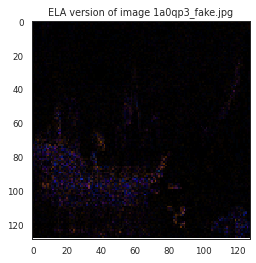

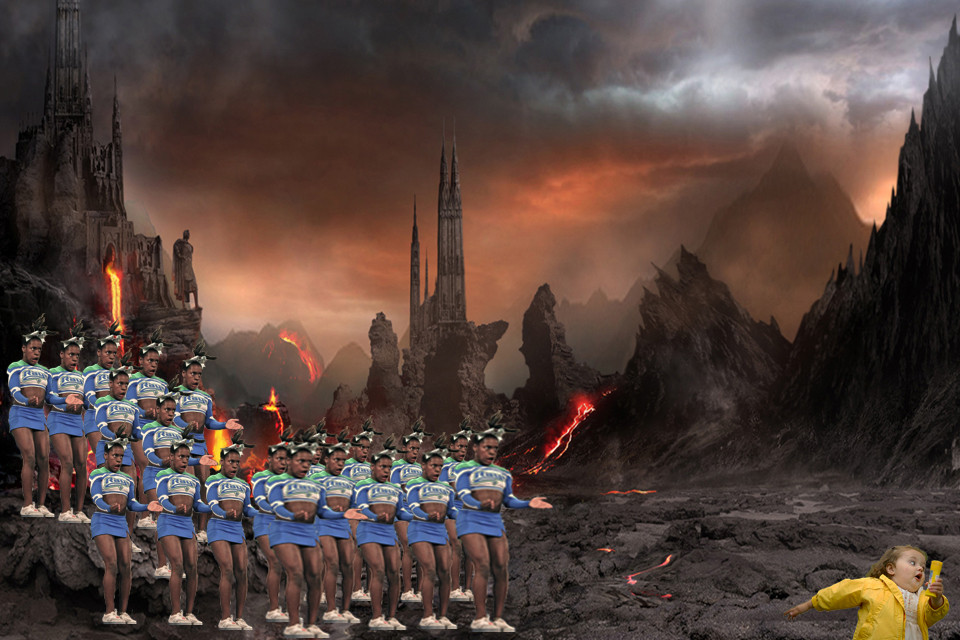

In [0]:
# Take a look at a sample image

def plot_image(img_num):
    
    file_name = dataset_correct['file_name'][img_num]
    img_name = re.sub('D:/ML final project/PS_Battles/dataset/', '', file_name)
    
    plt.imshow(X_train[img_num], interpolation='nearest')
    plt.title("ELA version of image {}".format(img_name))
    plt.show()
    return img_name

# Cheerleaders fake image 

# Fake
im_name = plot_image(2220)   

# Original
Image.open('/content/drive/My Drive/fake-or-not/data/dataset/'+im_name) 

## CNN architecture building:

In [0]:
# Release GPU memory

tf.keras.backend.clear_session()
model = []
history = []
try:
    del model
except:
    print("No model in memory")

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (5,5),padding = 'valid', 
                     activation ='relu', input_shape = (128,128,3)),

    tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                     activation ='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (5,5),padding = 'valid', 
                     activation ='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(60, activation = "relu",kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation = "sigmoid",kernel_regularizer=regularizers.l2(0.001))
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 64)      4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      51232     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0

In [0]:
# Model tools

optimizer = tf.keras.optimizers.RMSprop(lr=0.0005, rho=0.9, epsilon=1e-08, decay=0.0)

model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

# I test two stopping criterias:

early_stopping = keras.callbacks.EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=20,
                              verbose=0, mode='auto',restore_best_weights =True)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.999):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = [early_stopping]

In [8]:
# Training

epochs = 50
batch_size = 100
#checkpoint_cb = keras.callbacks.ModelCheckpoint('ELA_CNN_model.h5', save_best_only = True)

history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs,
          validation_data = (X_val, Y_val), callbacks=[callbacks])

Epoch 1/50
149/149 [==============================] - 12s 79ms/step - loss: 0.6687 - accuracy: 0.6336 - val_loss: 0.6325 - val_accuracy: 0.6264
Epoch 2/50
149/149 [==============================] - 11s 75ms/step - loss: 0.6367 - accuracy: 0.6738 - val_loss: 0.5838 - val_accuracy: 0.7145
Epoch 3/50
149/149 [==============================] - 11s 75ms/step - loss: 0.6289 - accuracy: 0.6797 - val_loss: 0.5917 - val_accuracy: 0.7161
Epoch 4/50
149/149 [==============================] - 11s 75ms/step - loss: 0.6232 - accuracy: 0.6846 - val_loss: 0.6377 - val_accuracy: 0.7258
Epoch 5/50
149/149 [==============================] - 11s 75ms/step - loss: 0.6174 - accuracy: 0.6896 - val_loss: 0.6041 - val_accuracy: 0.7252
Epoch 6/50
149/149 [==============================] - 11s 73ms/step - loss: 0.6146 - accuracy: 0.6930 - val_loss: 0.5917 - val_accuracy: 0.7192
Epoch 7/50
149/149 [==============================] - 11s 73ms/step - loss: 0.6105 - accuracy: 0.6914 - val_loss: 0.5738 - val_accuracy:

In [9]:
model.evaluate(X_val, Y_val)

100/100 [==============================] - 1s 10ms/step - loss: 0.5767 - accuracy: 0.7403


[0.5767478346824646, 0.7403210401535034]

In [10]:
model.evaluate(X_test, Y_test)

100/100 [==============================] - 1s 10ms/step - loss: 0.6066 - accuracy: 0.7114


[0.6065935492515564, 0.711362898349762]

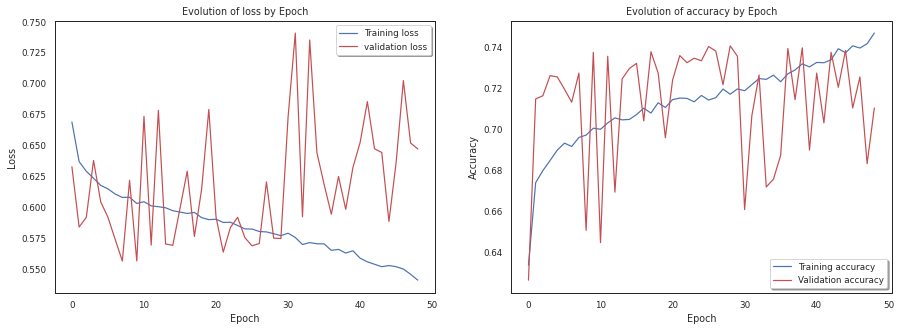

In [11]:
# Plot the loss and accuracy curves for training and validation

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
ax[0].set_ylabel("Loss")
ax[0].set_xlabel("Epoch")
ax[0].set_title("Evolution of loss by Epoch")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax[1].set_ylabel("Accuracy")
ax[1].set_xlabel("Epoch")
ax[1].set_title("Evolution of accuracy by Epoch")
legend = ax[1].legend(loc='best', shadow=True)

## Output

In [0]:
path_test = dataset_correct['file_name'][18005:]
Y_pred = model.predict(X_test)

In [0]:
output = pd.DataFrame({'path': path_test,'label_0': Y_pred[:,0],'label_1':Y_pred[:,1]}, columns=['path','label_0','label_1'])
output.to_csv('/content/drive/My Drive/fake-or-not/Result/output_ELA_CNN.csv')